In [8]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from constants import DATA_DIRECTORY


In [9]:

sample_path = os.path.join(DATA_DIRECTORY, 'train/00414.json')
with open(sample_path, 'r') as f:
    sample = json.load(f)

vid_id = sample['vid_id']
label = sample['label']
features = sample['features']


In [10]:
n_frames = len(features)

hand0 = np.zeros((n_frames, 21, 3))
hand1 = np.zeros((n_frames, 21, 3))
head = np.zeros((n_frames, 2))


In [11]:
for ind in range(n_frames):
    frame = features[str(ind)]
    h0 = np.array(list(frame['hand0'].values()))
    h1 = np.array(list(frame['hand1'].values()))
    hd = np.array(frame['face'])
    
    if h0.shape == (1, 3):
        h0 = np.zeros((21, 3))
        
    if h1.shape == (1, 3):
        h0 = np.zeros((21, 3))

    hand0[ind, ::] = h0
    hand1[ind, ::] = h1
    head[ind, ::] = hd


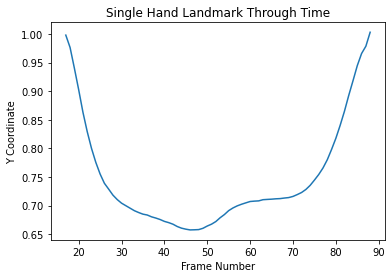

In [12]:
single_point = hand1[:, 13, 1]
axis = np.arange(n_frames)
plt.plot(axis, single_point)
plt.title('Single Hand Landmark Through Time')
plt.xlabel('Frame Number')
plt.ylabel('Y Coordinate')
plt.savefig('single-point-y.png')
plt.show()


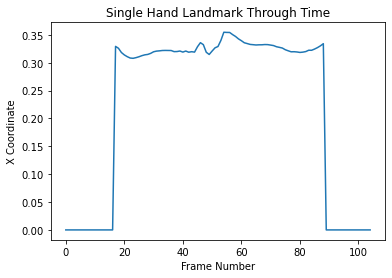

In [13]:
single_point = hand0[:, 0, 0]
axis = np.arange(n_frames)
plt.plot(axis, single_point)
plt.title('Single Hand Landmark Through Time')
plt.xlabel('Frame Number')
plt.ylabel('X Coordinate')
plt.savefig('single-point-x.png')
plt.show()


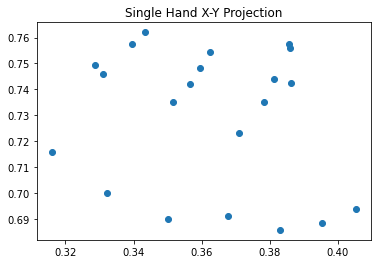

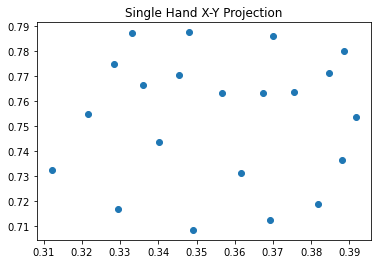

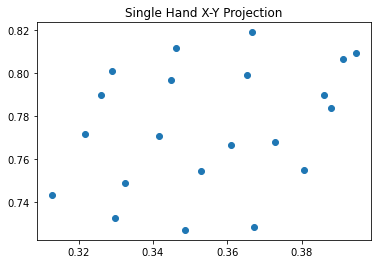

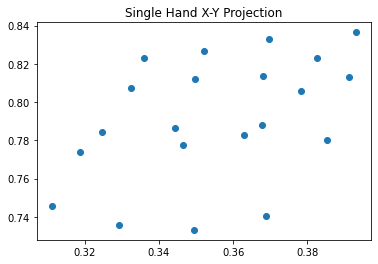

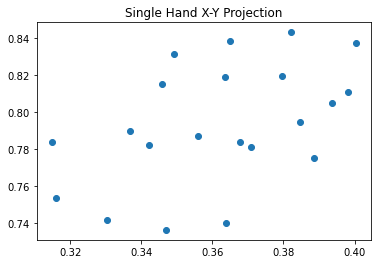

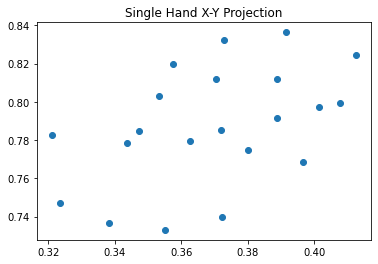

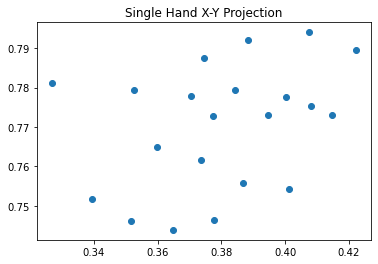

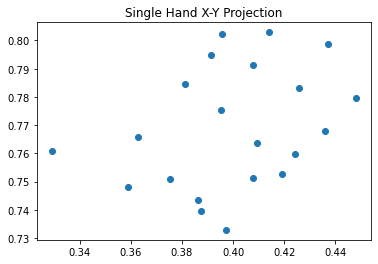

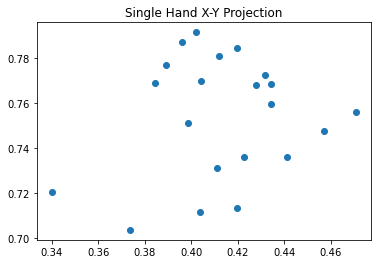

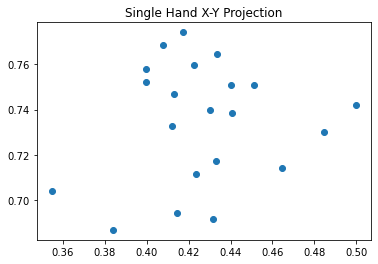

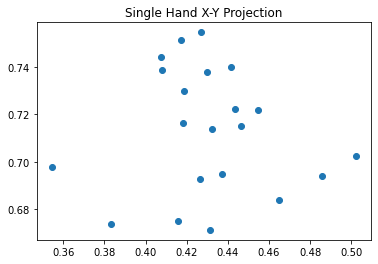

In [14]:
for ind in range(45, 56):
    single_hand = hand0[ind, :, :2]
    plt.scatter(single_hand[:, 0], single_hand[:, 1])
    plt.title('Single Hand X-Y Projection')
    plt.savefig(f'single-hand-{ind}.png')
    plt.show()
